In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
gini_nonsmart_all = pd.read_csv('Results/Gini/All_non-smart_cities_Gini_index_v1.1.csv',header=None)
gini_nonsmart_all = gini_nonsmart_all.as_matrix()

In [3]:
gini_smart_all = pd.read_csv('Results/Gini/All_smart_cities_Gini_index_v1.1.csv',header=None)
gini_smart_all = gini_smart_all.as_matrix()

In [4]:
gini_smart_iese = pd.read_csv('Results/Gini/IESE_smart_cities_Gini_index_v1.1.csv',header=None)
gini_smart_iese = gini_smart_iese.as_matrix()
gini_smart_easy = pd.read_csv('Results/Gini/Easypark_smart_cities_Gini_index_v1.1.csv',header=None)
gini_smart_easy = gini_smart_easy.as_matrix()

In [5]:
gini_nonsmart_all = gini_nonsmart_all.reshape(-1)
gini_smart_all = gini_smart_all.reshape(-1)
gini_smart_iese = gini_smart_iese.reshape(-1)
gini_smart_easy = gini_smart_easy.reshape(-1)

gini_norm = np.linalg.norm(np.append(gini_nonsmart_all, gini_smart_all))

gini_nonsmart_all /= gini_norm
gini_smart_all /= gini_norm
gini_smart_iese /= gini_norm
gini_smart_easy /= gini_norm

In [6]:
g_nonsmart_all = pd.read_csv('Results/All_non-smart_cities_G_index_v1.1.csv',header=None)
g_nonsmart_all = g_nonsmart_all.as_matrix()
g_smart_all = pd.read_csv('Results/All_smart_cities_G_index_v1.1.csv',header=None)
g_smart_all = g_smart_all.as_matrix()
g_smart_iese = pd.read_csv('Results/IESE_smart_cities_G_index_v1.1.csv',header=None)
g_smart_iese = g_smart_iese.as_matrix()
g_smart_easy = pd.read_csv('Results/Easypark_smart_cities_G_index_v1.1.csv',header=None)
g_smart_easy = g_smart_easy.as_matrix()

In [7]:
g_nonsmart_all = g_nonsmart_all.T[-1]
g_smart_all = g_smart_all.T[-1]
g_smart_iese = g_smart_iese.T[-1]
g_smart_easy = g_smart_easy.T[-1]

g_norm = np.linalg.norm(np.append(g_nonsmart_all, g_smart_all))

g_nonsmart_all /= g_norm
g_smart_all /= g_norm
g_smart_iese /= g_norm
g_smart_easy /= g_norm

In [138]:
mpl.rcParams['figure.figsize']   = (12,10)
mpl.rcParams['figure.dpi']       = 200
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['axes.titlesize']   = 15
mpl.rcParams['axes.labelsize']   = 20
mpl.rcParams['axes.labelsize']   = 20
mpl.rcParams['lines.linewidth']  = 1
mpl.rcParams['lines.markersize'] = 3

Text(0,0.5,'$G-index$')

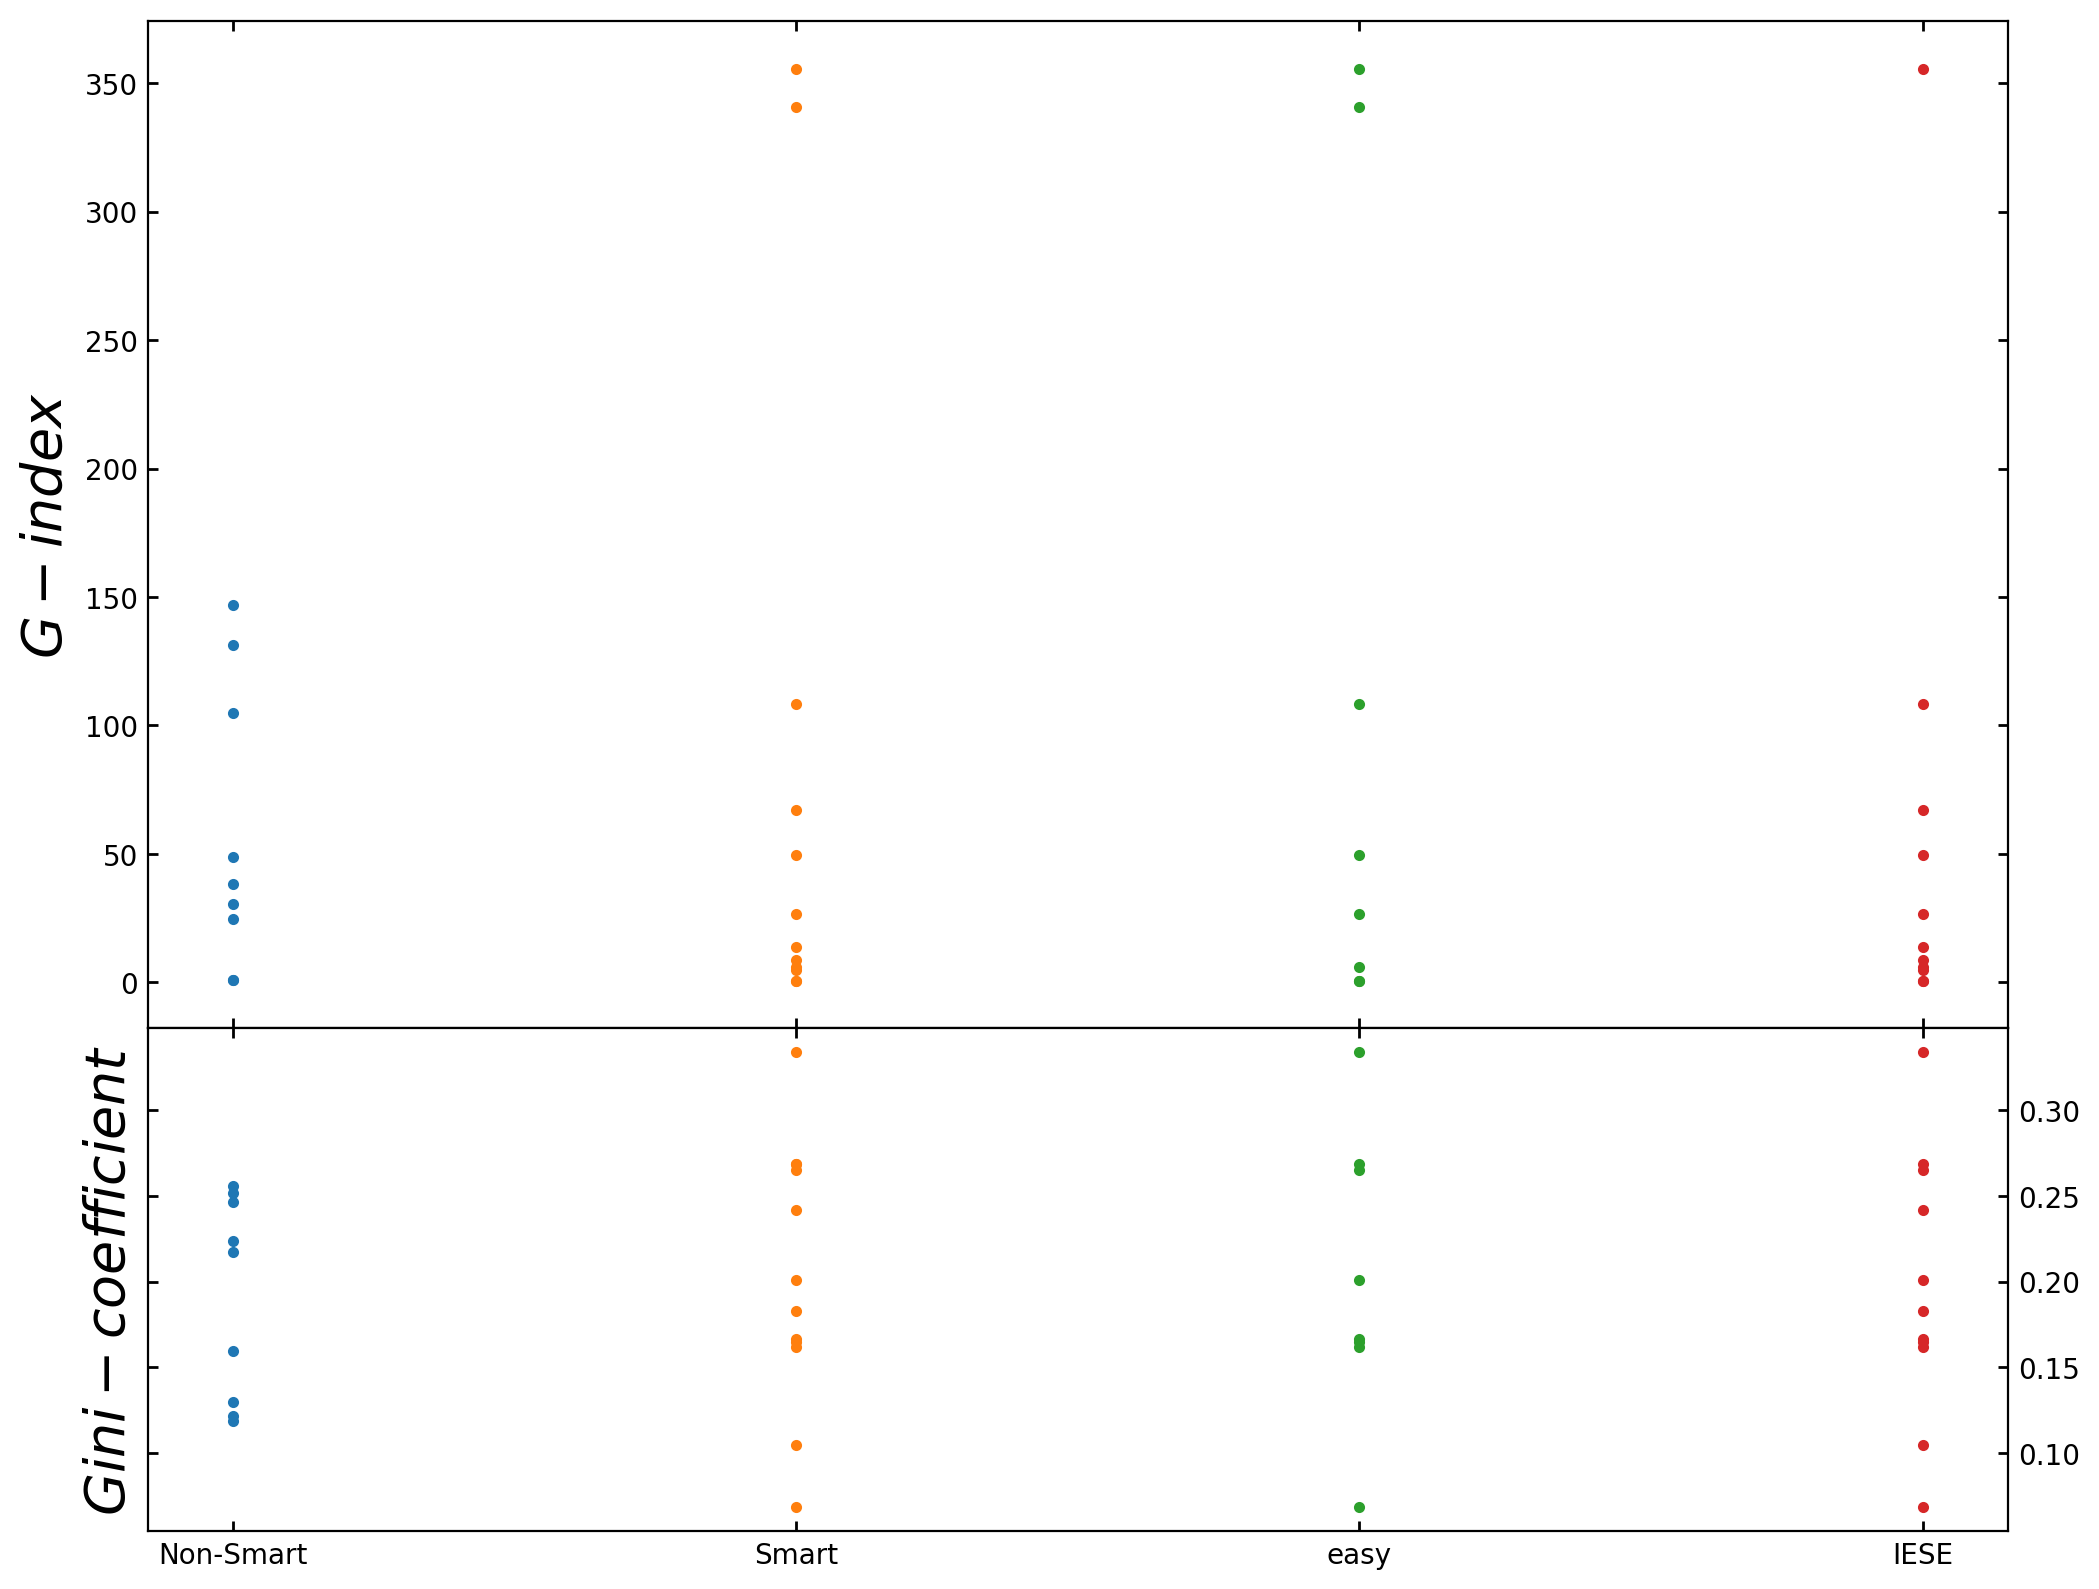

In [139]:
fig = plt.figure()

gs = gridspec.GridSpec(3, 1, hspace=0, wspace=0)

ax0 = plt.subplot(gs[:2])
x = np.ones_like(g_nonsmart_all)
scat_nonsmart = ax0.scatter(x,g_nonsmart_all)
x = np.ones_like(g_smart_all)*2
scat_smart    = ax0.scatter(x,g_smart_all)
x = np.ones_like(g_smart_easy)*3
scat_easy     = ax0.scatter(x,g_smart_easy)
x = np.ones_like(g_smart_iese)*4
scat_iese     = ax0.scatter(x,g_smart_iese)

ax1 = plt.subplot(gs[2])
x = np.ones_like(gini_nonsmart_all)
scat_nonsmart = ax1.scatter(x,gini_nonsmart_all)
x = np.ones_like(gini_smart_all)*2
scat_smart    = ax1.scatter(x,gini_smart_all)
x = np.ones_like(gini_smart_easy)*3
scat_easy     = ax1.scatter(x,gini_smart_easy)
x = np.ones_like(gini_smart_iese)*4
scat_iese     = ax1.scatter(x,gini_smart_iese)

for ax in fig.axes[:]:
    ax.tick_params(direction='in', width=1, right=1, top=1)
    
ax0.set_xticklabels([])
ax0.set_xticks([1,2,3,4])
ax1.set_xticklabels(['Non-Smart','Smart','easy','IESE'])
ax1.set_xticks([1,2,3,4])

for ax in fig.axes[1::2]:
    for tick in ax.yaxis.get_major_ticks():
        tick.label1On = False
        tick.label2On = True
        
ax1.set_ylabel(r'$Gini-coefficient$')
ax0.set_ylabel(r'$G-index$')

In [46]:
IESE = np.append(np.ones(9)*200, np.array([34,16,14,1,9,15,12,18,4,6,5,2]))

In [47]:
easy = np.append(np.ones(9)*200, np.array([14,12,10,24,13,32,36,46,5,28,7,17]))

In [48]:
ranking = np.append(np.ones(9)*200, np.array([24,14,12,12.5,11,23.5,24,32,4.5,17,6,9.5]))

In [82]:
d = {'Gini':np.append(gini_nonsmart_all, gini_smart_all)[9:], 'G-index': np.append(g_nonsmart_all, g_smart_all)[9:], 'iese': IESE[9:], 'easy': easy[9:], 'average': ranking[9:]}

In [83]:
i = ["San Antonio", "San Diego", "Austin", "Jacksonville", "Columbus", "Indianapolis", "Brisbane", "Perth", "Adelaide", "Hamburg", "Sydney", "Melbourne", "New York", "Berlin", "Vienna", "Chicago", "Los Angeles", "Boston", "Washington D.C.", "San Francisco", "London"]

In [84]:
df = pd.DataFrame(d, index=i[9:])

In [85]:
df

,G-index,Gini,average,easy,iese
Hamburg,340.738127,0.268323,24.0,14.0,34.0
Sydney,355.696874,0.166691,14.0,12.0,16.0
Melbourne,26.435298,0.161879,12.0,10.0,14.0
New York,8.551514,0.182674,12.5,24.0,1.0
Berlin,0.662508,0.068694,11.0,13.0,9.0
Vienna,4.965721,0.104676,23.5,32.0,15.0
Chicago,67.050811,0.241578,24.0,36.0,12.0
Los Angeles,108.367796,0.333698,32.0,46.0,18.0
Boston,49.750536,0.264991,4.5,5.0,4.0
Washington D.C.,13.589943,0.268814,17.0,28.0,6.0


In [86]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

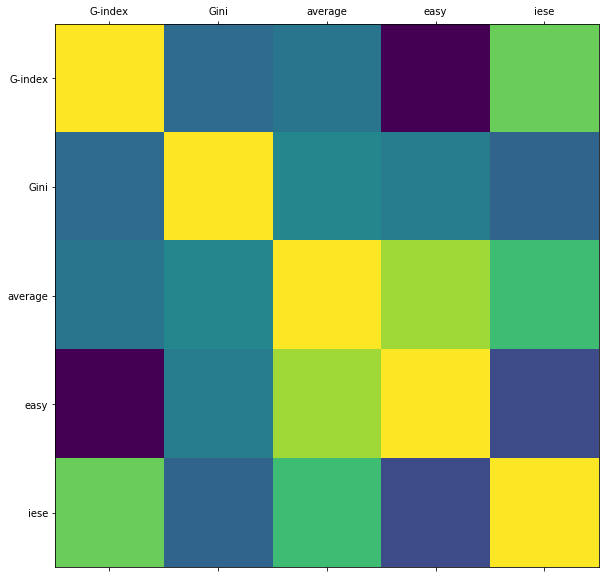

In [87]:
plot_corr(df)

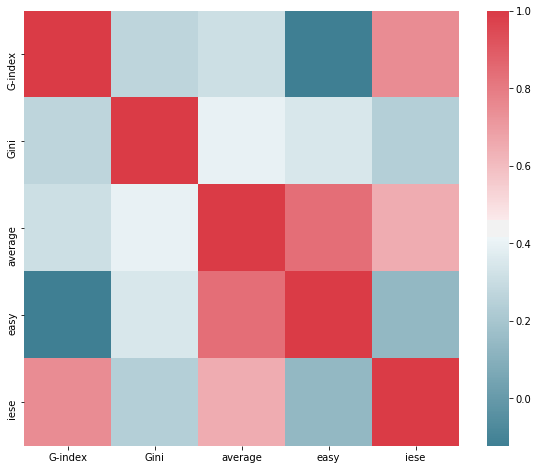

In [88]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [89]:
corr

,G-index,Gini,average,easy,iese
G-index,1.000000,0.268256,0.314177,-0.122366,0.746243
Gini,0.268256,1.000000,0.396952,0.348981,0.238175
average,0.314177,0.396952,1.000000,0.841019,0.653369
easy,-0.122366,0.348981,0.841019,1.000000,0.139932
iese,0.746243,0.238175,0.653369,0.139932,1.000000


In [143]:
mpl.rcParams['figure.figsize']   = (12,10)
mpl.rcParams['figure.dpi']       = 200
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['axes.titlesize']   = 15
mpl.rcParams['axes.labelsize']   = 10
mpl.rcParams['lines.linewidth']  = 3
mpl.rcParams['lines.markersize'] = 5

In [145]:
g_norm = np.linalg.norm(np.append(g_nonsmart_all, g_smart_all))

In [146]:
IESE = np.append(np.ones(9)*200, np.array([34,16,14,1,9,15,12,18,4,6,5,2]))

In [147]:
easy = np.append(np.ones(9)*200, np.array([14,12,10,24,13,32,36,46,5,28,7,17]))

In [148]:
ranking = np.append(np.ones(9)*200, np.array([24,14,12,12.5,11,23.5,24,32,4.5,17,6,9.5]))

In [149]:
d = {'Gini':np.append(gini_nonsmart_all, gini_smart_all)[9:], 'G-index': np.append(g_nonsmart_all, g_smart_all)[9:]/g_norm, 'iese': IESE[9:], 'easy': easy[9:], 'average': ranking[9:]}

In [150]:
i = ["San Antonio", "San Diego", "Austin", "Jacksonville", "Columbus", "Indianapolis", "Brisbane", "Perth", "Adelaide", "Hamburg", "Sydney", "Melbourne", "New York", "Berlin", "Vienna", "Chicago", "Los Angeles", "Boston", "Washington D.C.", "San Francisco", "London"]

In [151]:
df = pd.DataFrame(d, index=i[9:])

In [152]:
df

,G-index,Gini,average,easy,iese
Hamburg,0.604692,0.268323,24.0,14.0,34.0
Sydney,0.631238,0.166691,14.0,12.0,16.0
Melbourne,0.046913,0.161879,12.0,10.0,14.0
New York,0.015176,0.182674,12.5,24.0,1.0
Berlin,0.001176,0.068694,11.0,13.0,9.0
Vienna,0.008812,0.104676,23.5,32.0,15.0
Chicago,0.118992,0.241578,24.0,36.0,12.0
Los Angeles,0.192315,0.333698,32.0,46.0,18.0
Boston,0.088290,0.264991,4.5,5.0,4.0
Washington D.C.,0.024117,0.268814,17.0,28.0,6.0


/home/philipp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2291a95748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2291547080>]], dtype=object)

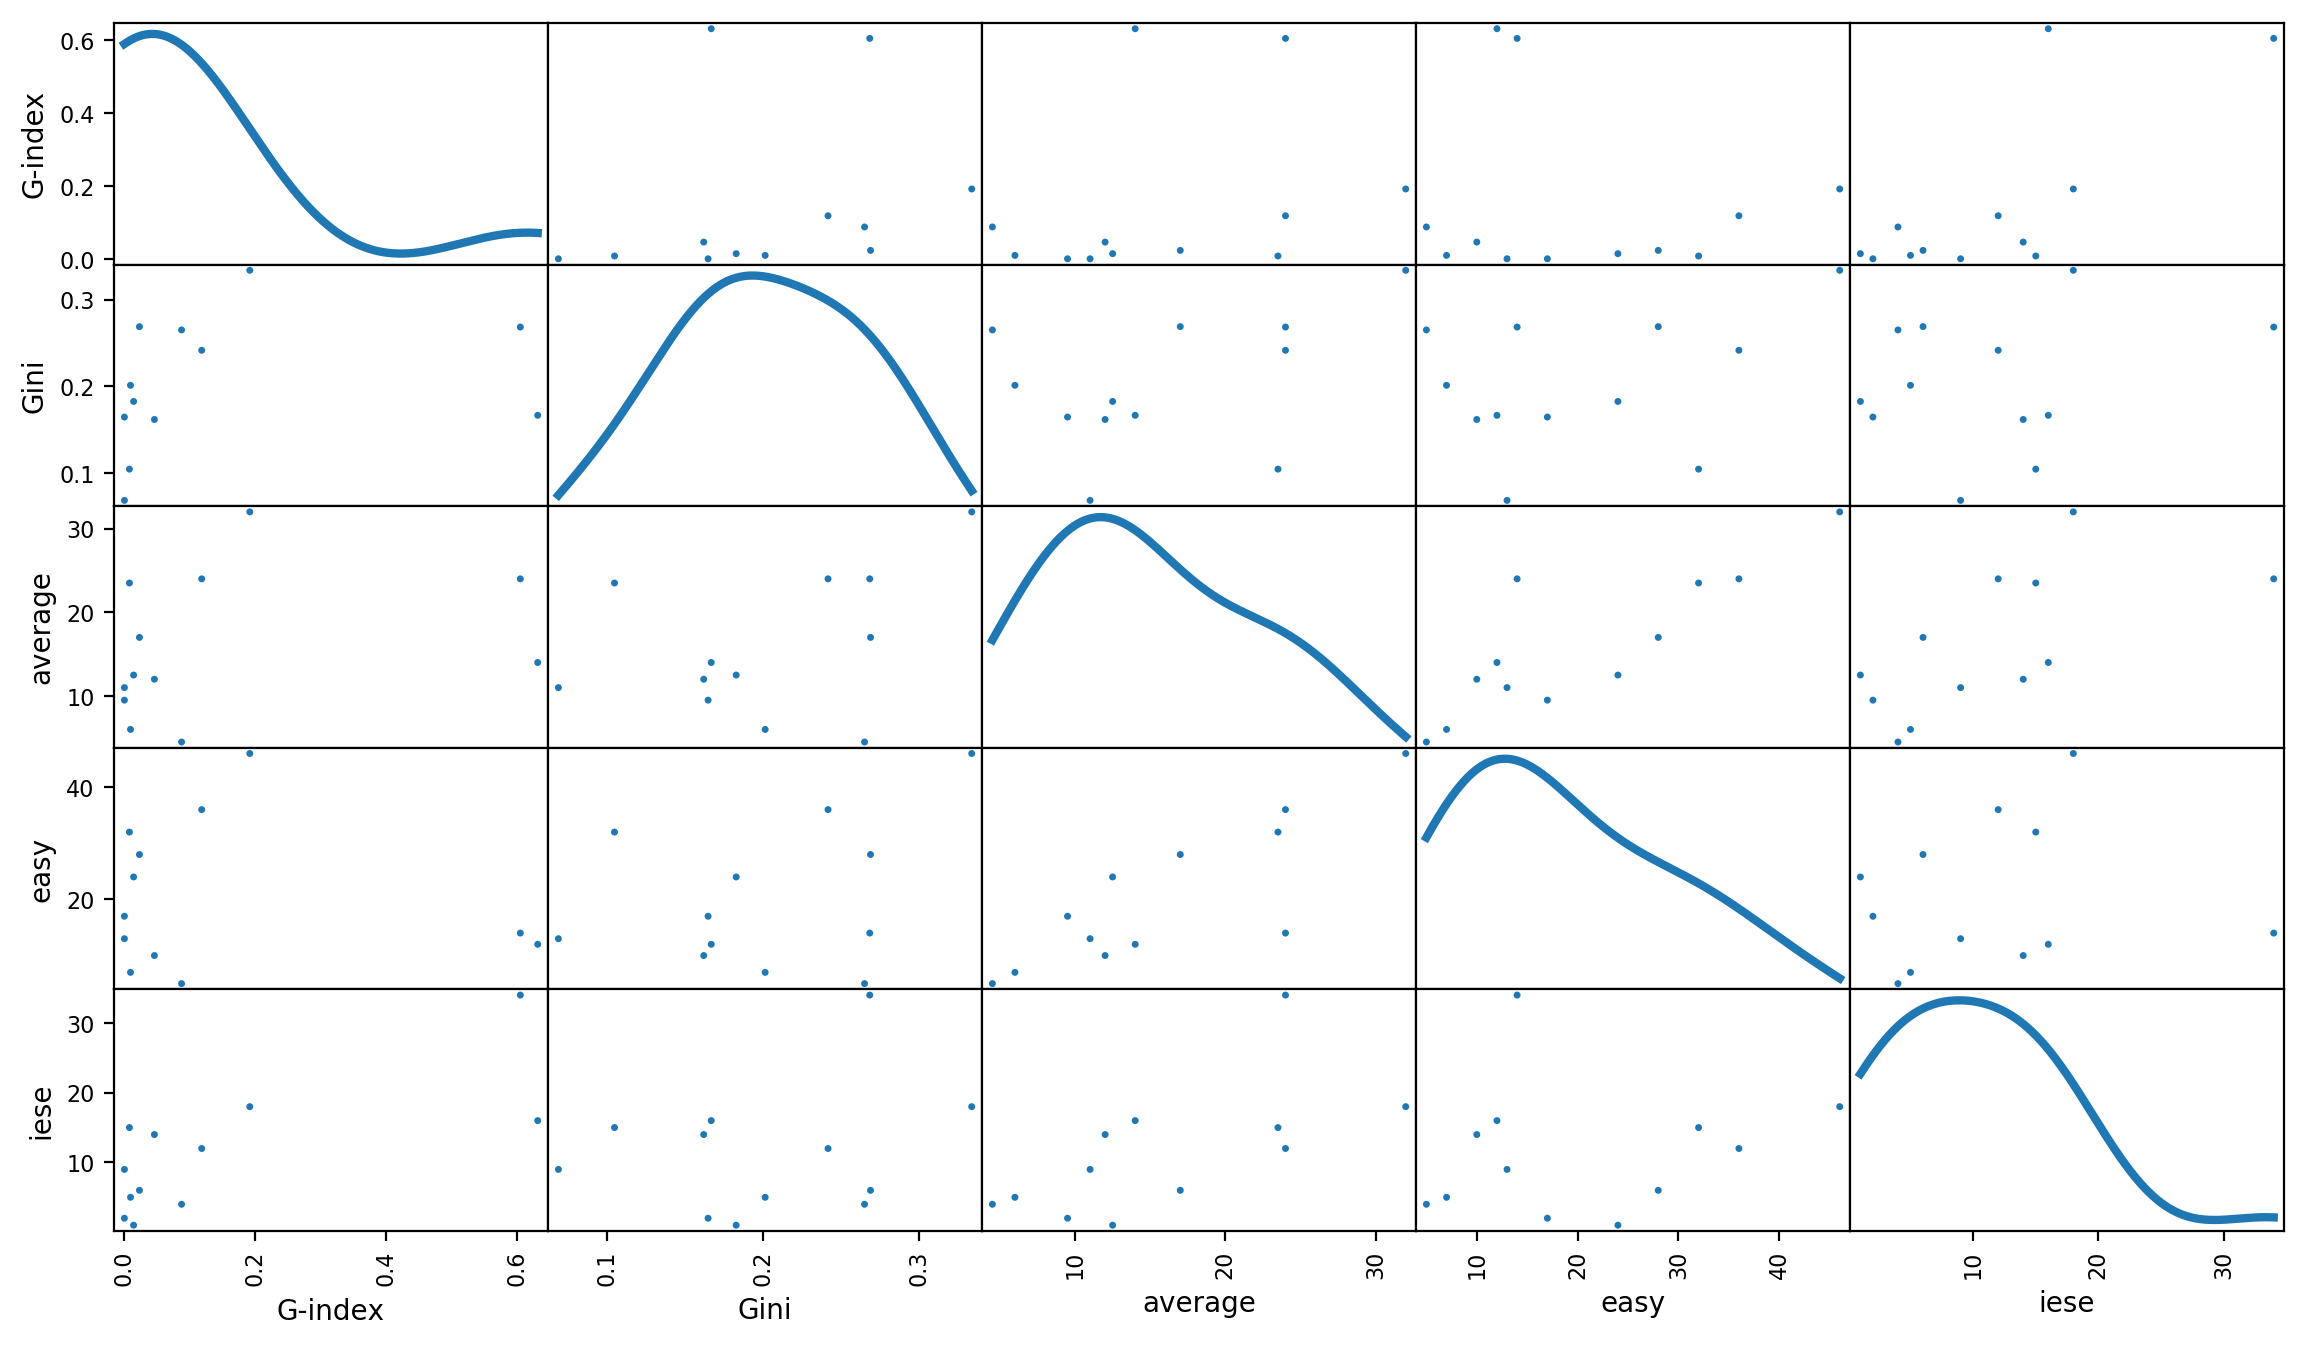

In [153]:
pd.scatter_matrix(df, alpha = 1, figsize = (14,8), diagonal = 'kde')